In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 
import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = df.columns.str.lower()
df.head(5)

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  

df['species']= label_encoder.fit_transform(df['species']) 
  
df['species'].unique() 

array([0, 1, 2])

In [5]:
print(f'Total Missing Values: \n{df.isna().sum()}')

Total Missing Values: 
id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64


In [6]:
print(f'Total Duplicate  Values: \n{df.isna().sum()}')

Total Duplicate  Values: 
id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64


In [7]:
des_stat=pd.DataFrame() # an empty dataframe
# Measure of central tendency
des_stat['Mean']=df.mean() # for mean of all columns
des_stat['Median']=df.median() # for median of all columns
des_stat['mode']=df.mode().iloc[0]
# measure of dispersion
# Range,STD,Varance,IQR,Skewness,Kurtosis,25%
des_stat['Range']=[np.ptp(df[i]) for i in df.columns]
des_stat['Stdev']=df.std()
des_stat['Variance']=df.var()
des_stat['Skewness']=df.skew()
des_stat['Kurtosis']=df.kurt()
des_stat['IQR']=[stats.iqr(df[i]) for i in df.columns]
des_stat['25%']=df.quantile(q=0.25,axis=0)
des_stat['50%']=df.quantile(q=0.50,axis=0)
des_stat['75%']=df.quantile(q=0.75,axis=0)
round(des_stat.T,2)

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
Mean,75.50,5.84,3.05,3.76,1.20,1.00
Median,75.50,5.80,3.00,4.35,1.30,1.00
mode,1.00,5.00,3.00,1.50,0.20,0.00
Range,149.00,3.60,2.40,5.90,2.40,2.00
Stdev,43.45,0.83,0.43,1.76,0.76,0.82
Variance,1887.50,0.69,0.19,3.11,0.58,0.67
Skewness,0.00,0.31,0.33,-0.27,-0.10,0.00
Kurtosis,-1.20,-0.55,0.29,-1.40,-1.34,-1.51
IQR,74.50,1.30,0.50,3.50,1.50,2.00
25%,38.25,5.10,2.80,1.60,0.30,0.00


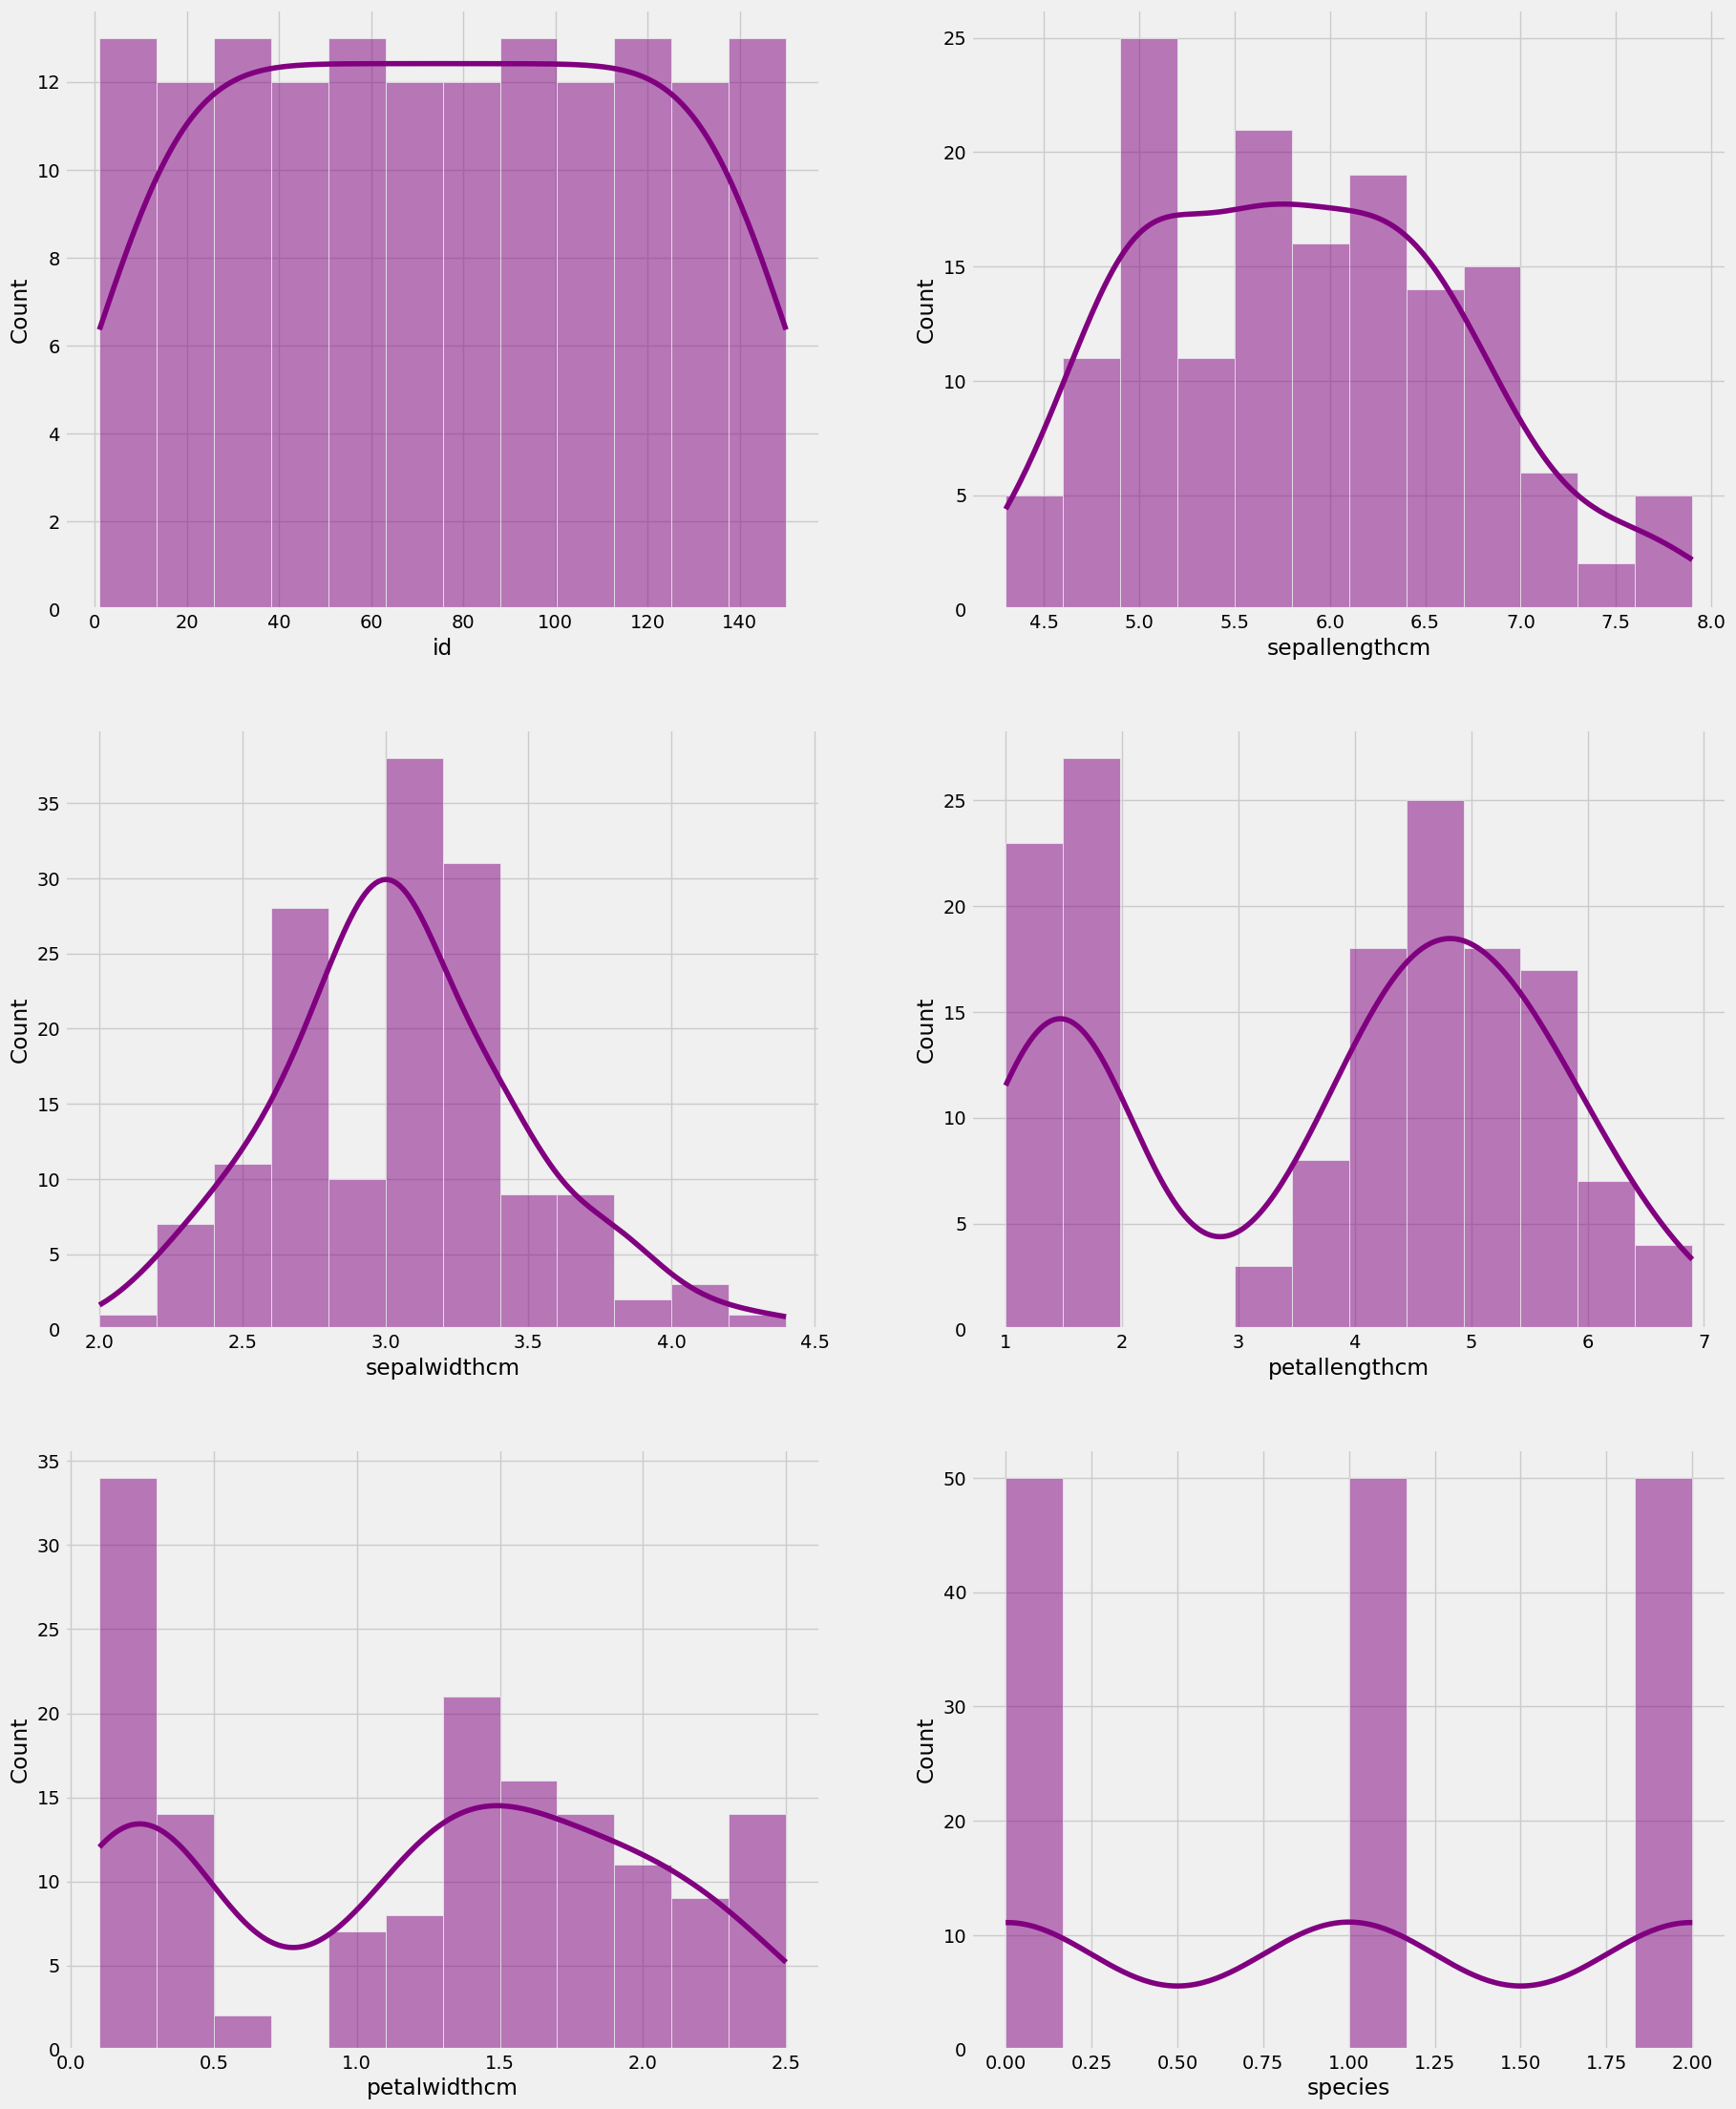

In [8]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'purple')
plt.show()

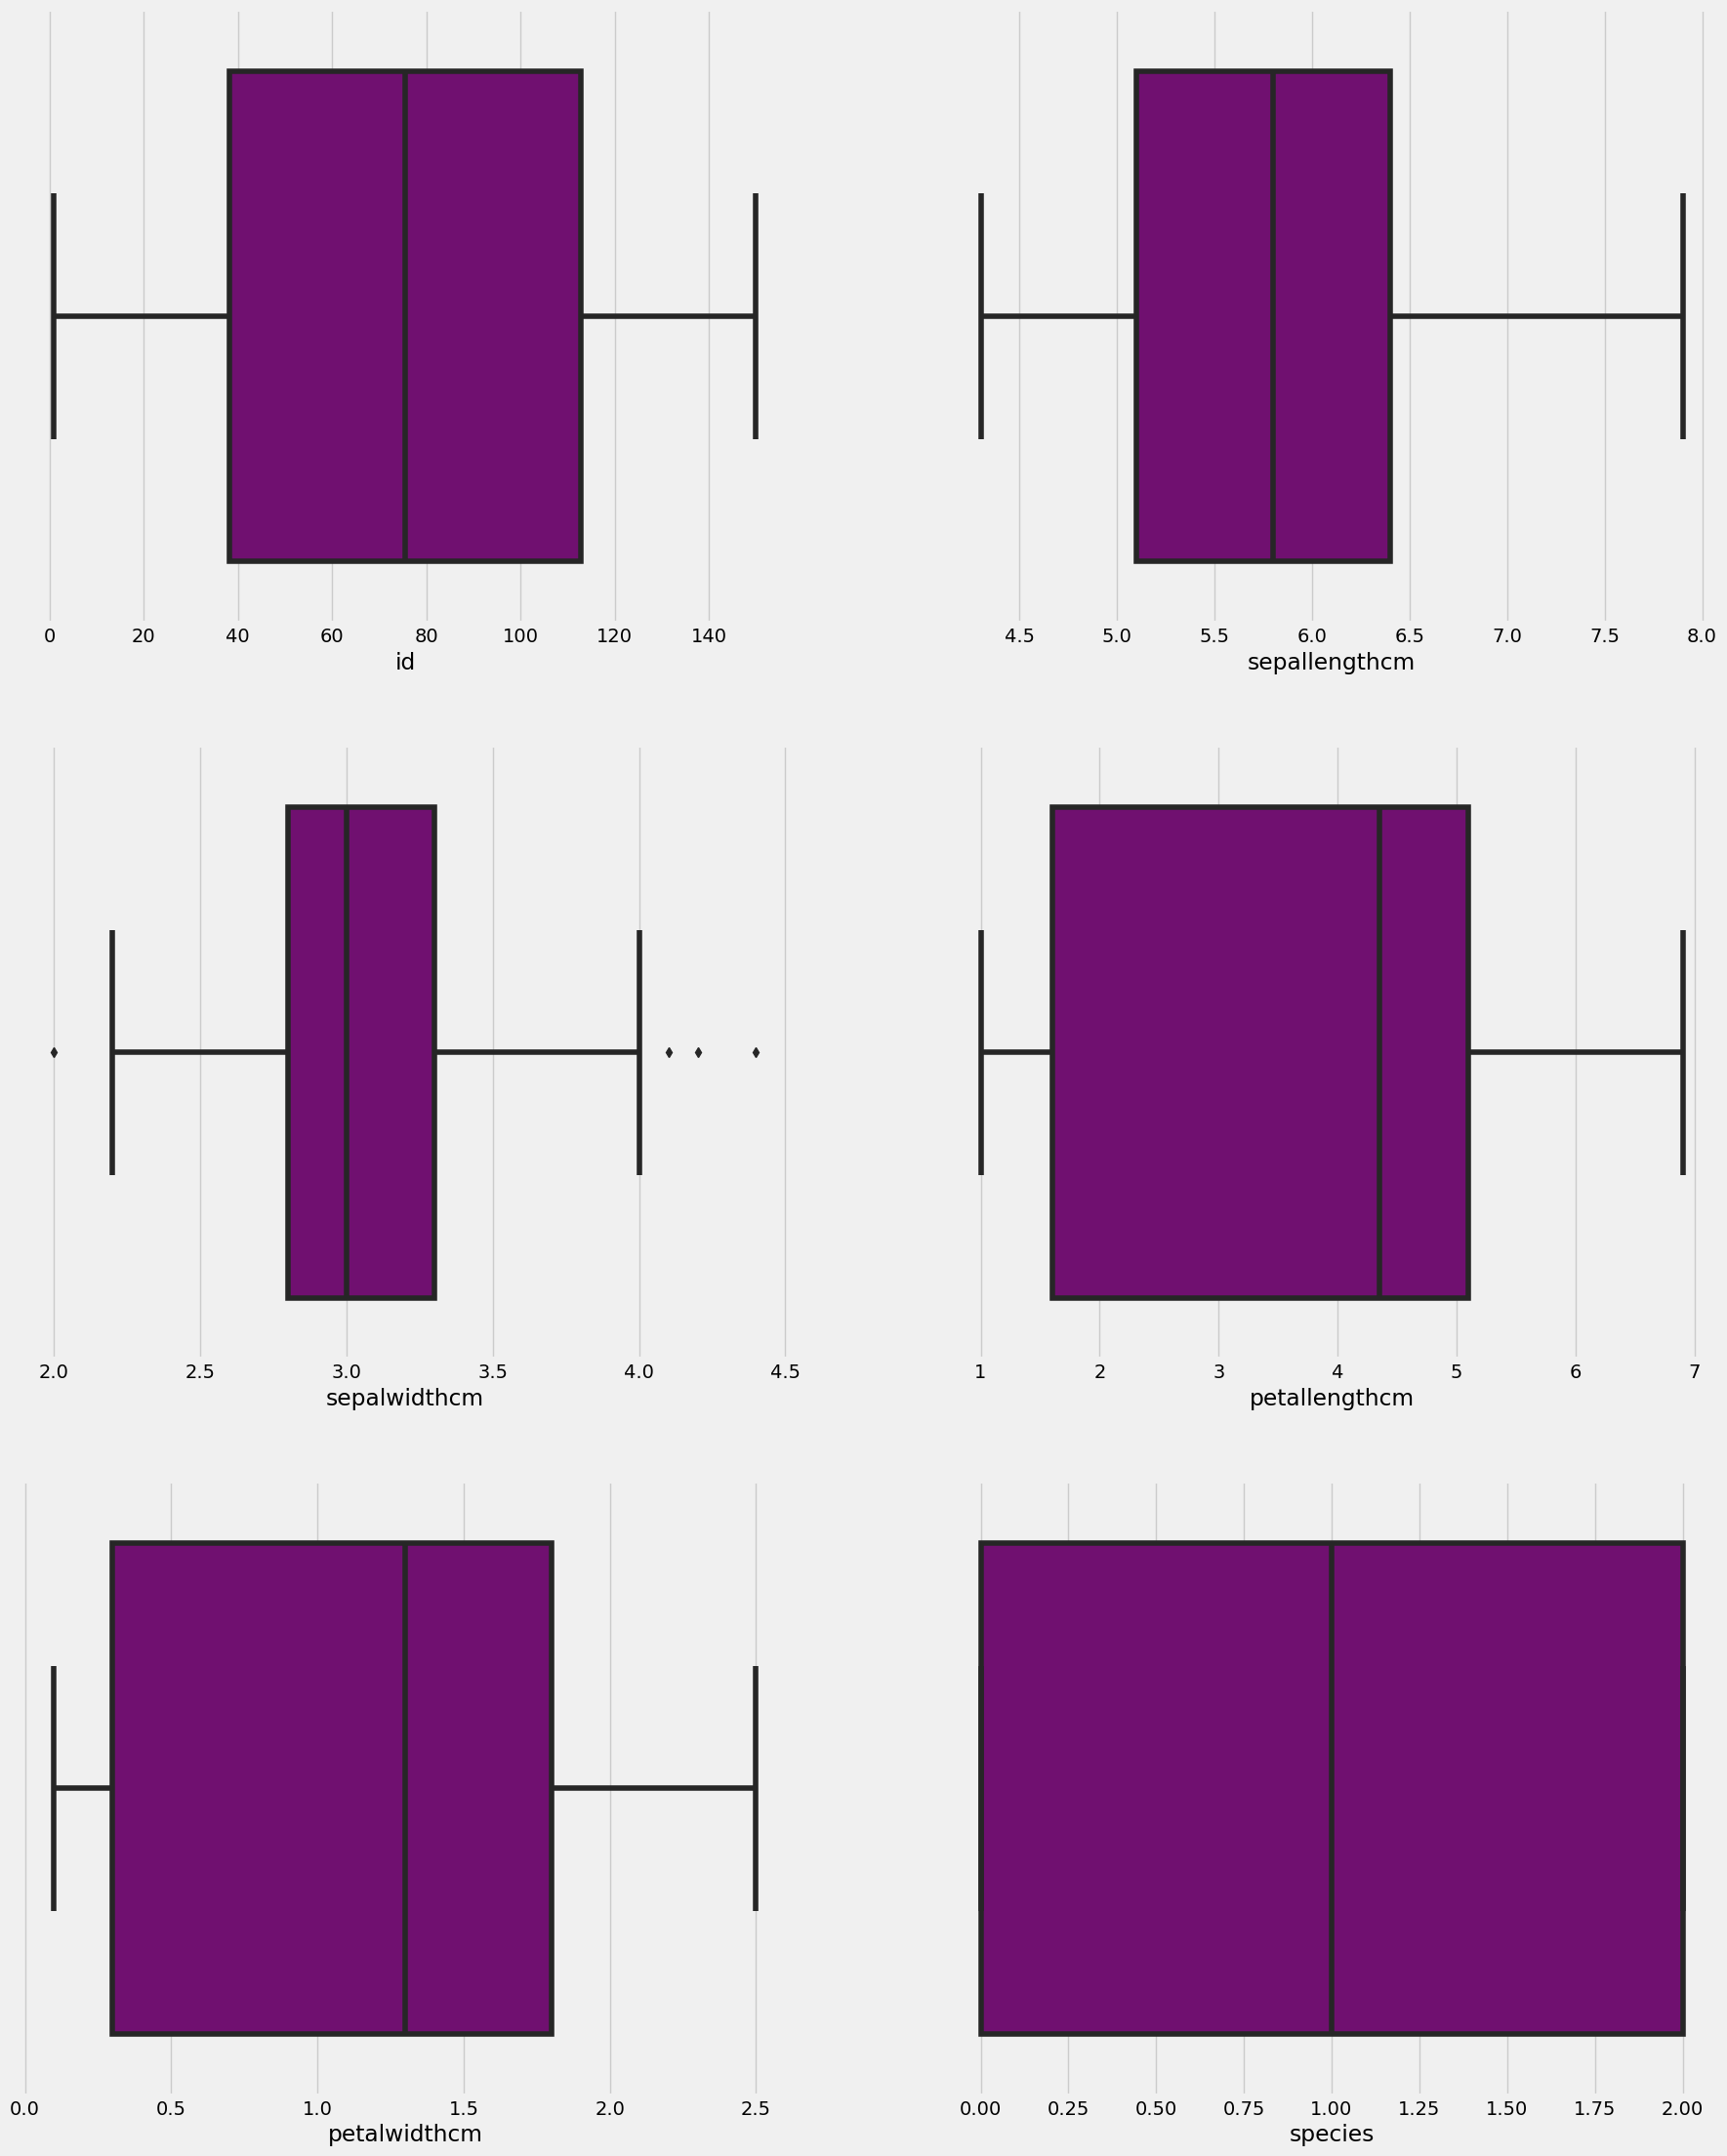

In [9]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'purple')
plt.show()

In [10]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

z_scores = zscore(df)
outliers = (np.abs(z_scores)>3)
outliers.sum()

id               0
sepallengthcm    0
sepalwidthcm     1
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [11]:
winsored_df=df.apply(lambda X: winsorize(X,limits=0.05))
winsored_df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,8,5.1,3.5,1.4,0.2,0
1,8,4.9,3.0,1.4,0.2,0
2,8,4.7,3.2,1.3,0.2,0
3,8,4.6,3.1,1.5,0.2,0
4,8,5.0,3.6,1.4,0.2,0


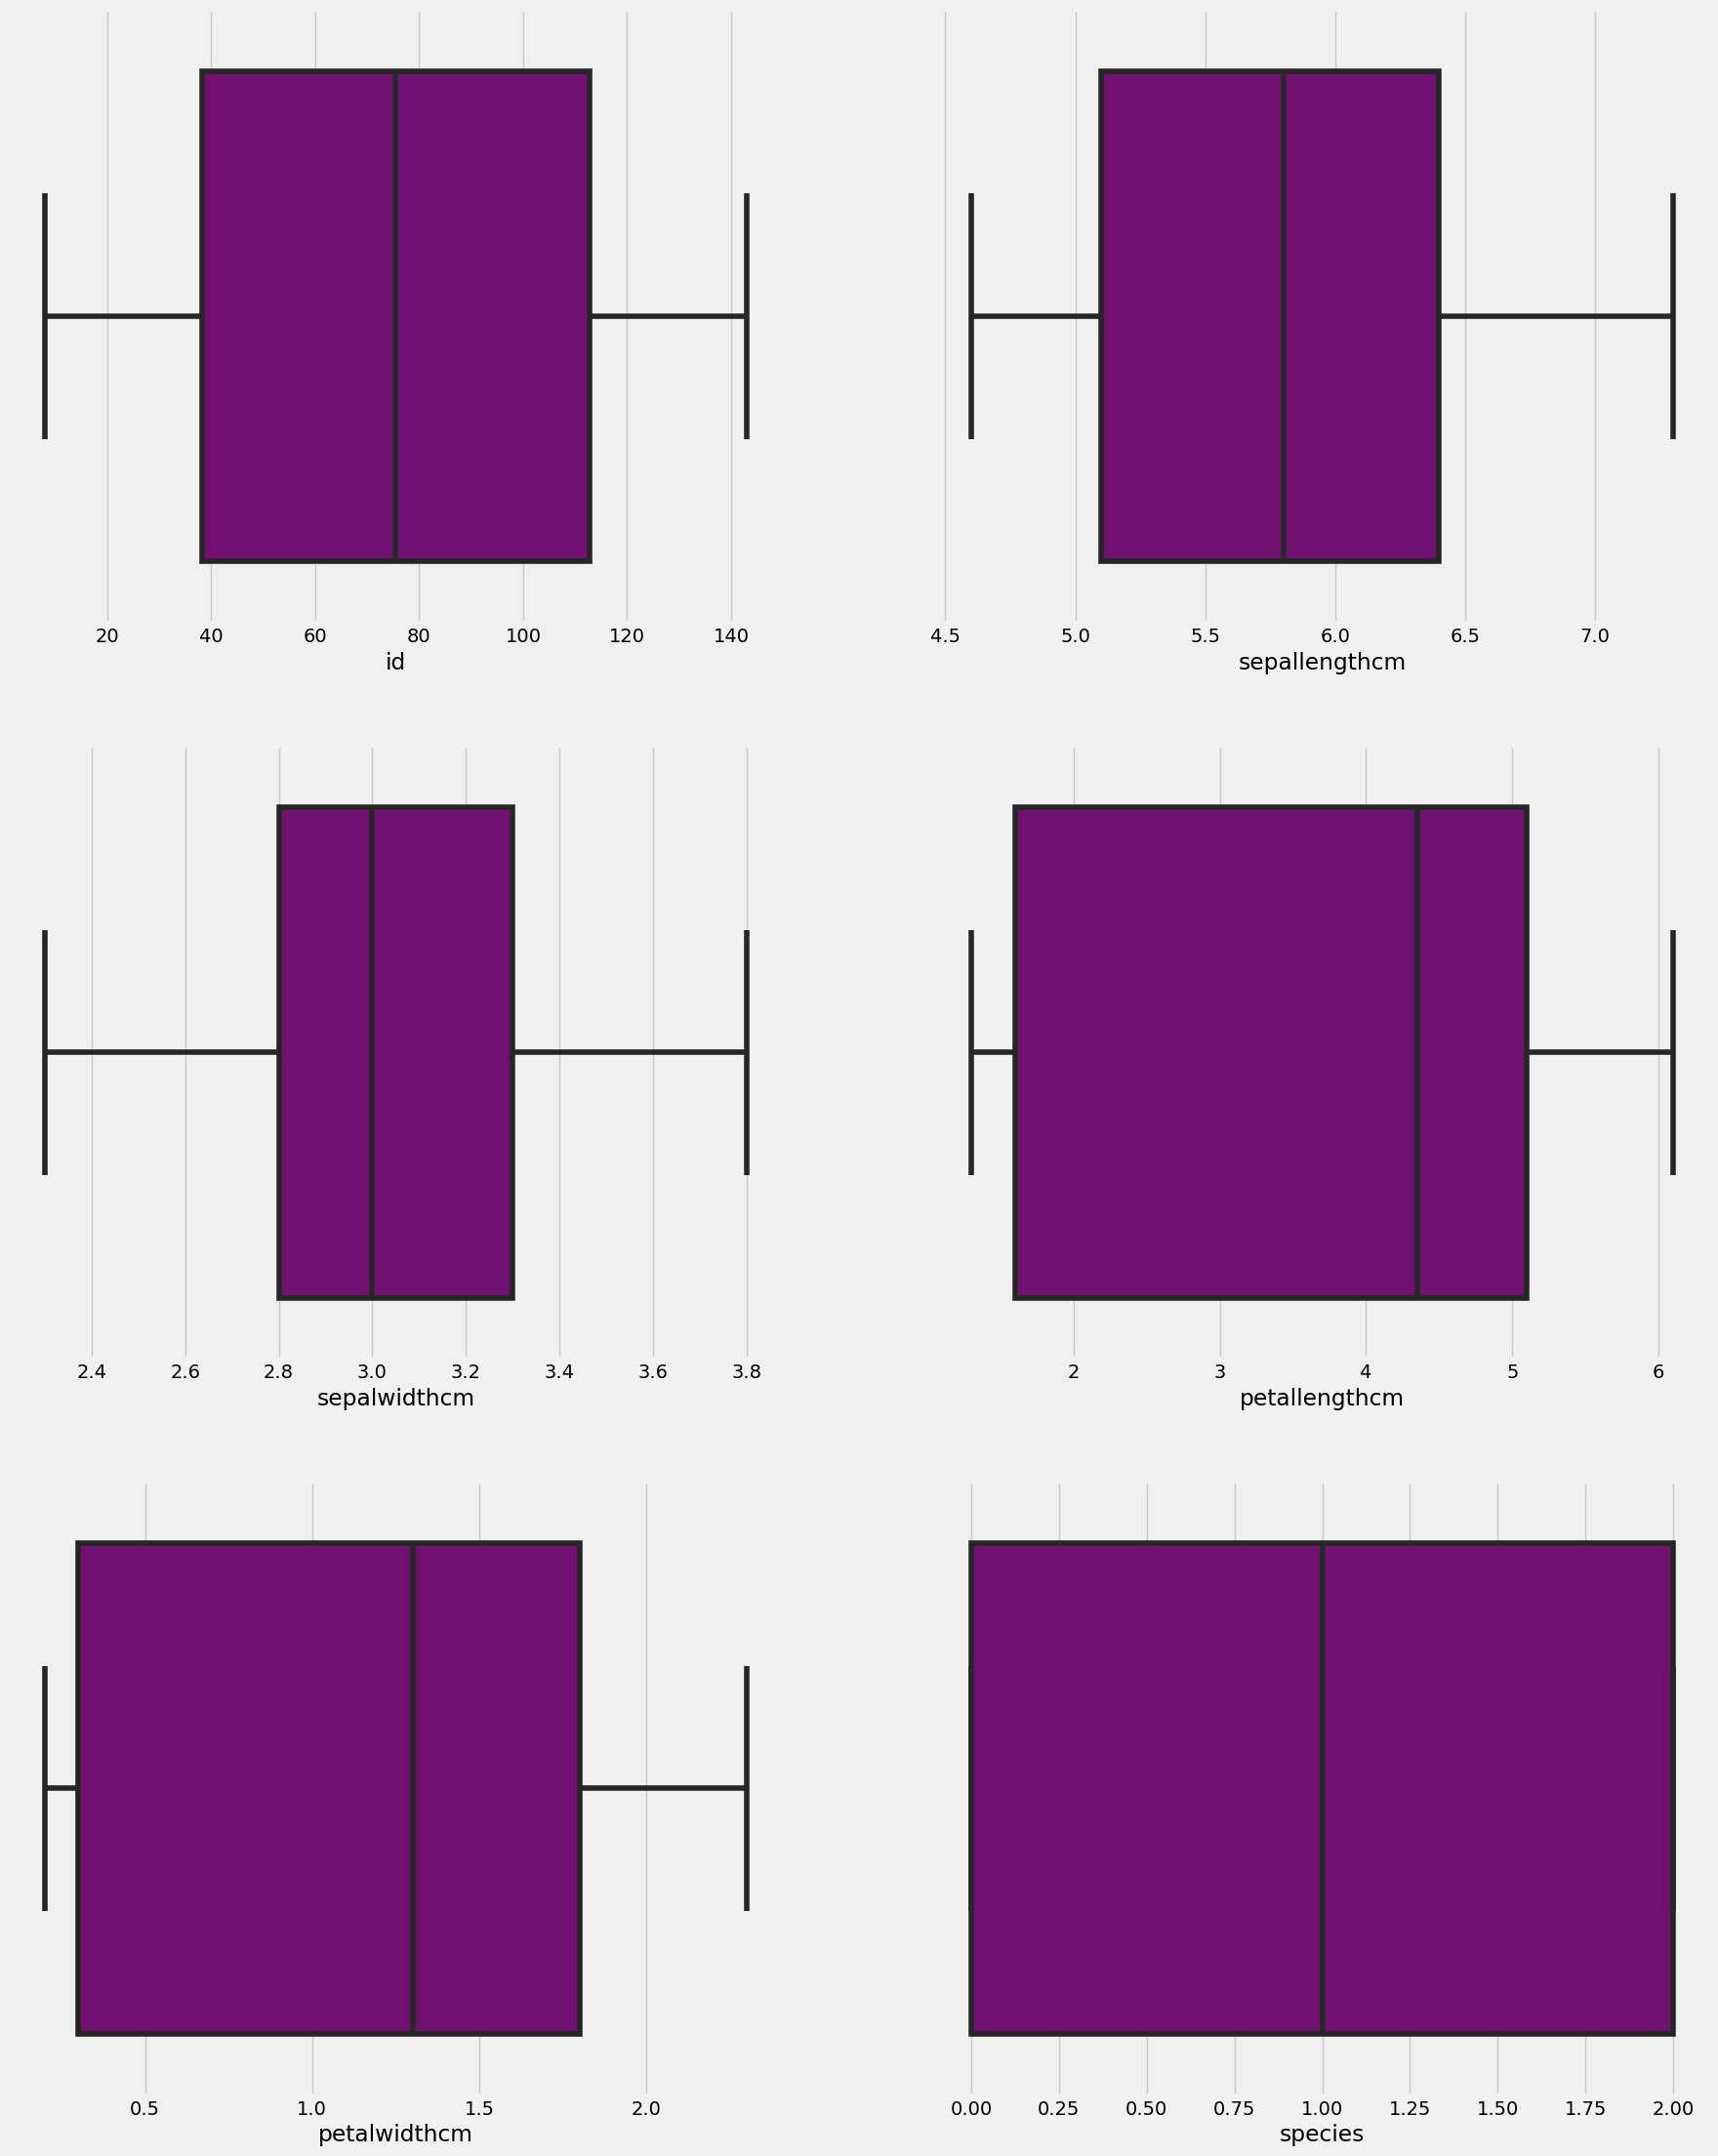

In [12]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = winsored_df, x = col, color = 'purple')
plt.show()

In [13]:
pearson_coef_val = []
p_val = []

for col in winsored_df.columns:
    pearson_coef, p_value = stats.pearsonr(winsored_df[col], winsored_df['species'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))

In [14]:
p_val

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [15]:
is_significant = []

for i in p_val:
    if i> 0.1:
        is_significant.append('No')
    else:
        is_significant.append('Yes')
is_significant

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [16]:
data = {
    'Feature': winsored_df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,id,0.945543,Yes
1,sepallengthcm,0.792457,Yes
2,sepalwidthcm,-0.418394,Yes
3,petallengthcm,0.952000,Yes
4,petalwidthcm,0.959293,Yes
5,species,1.000000,Yes


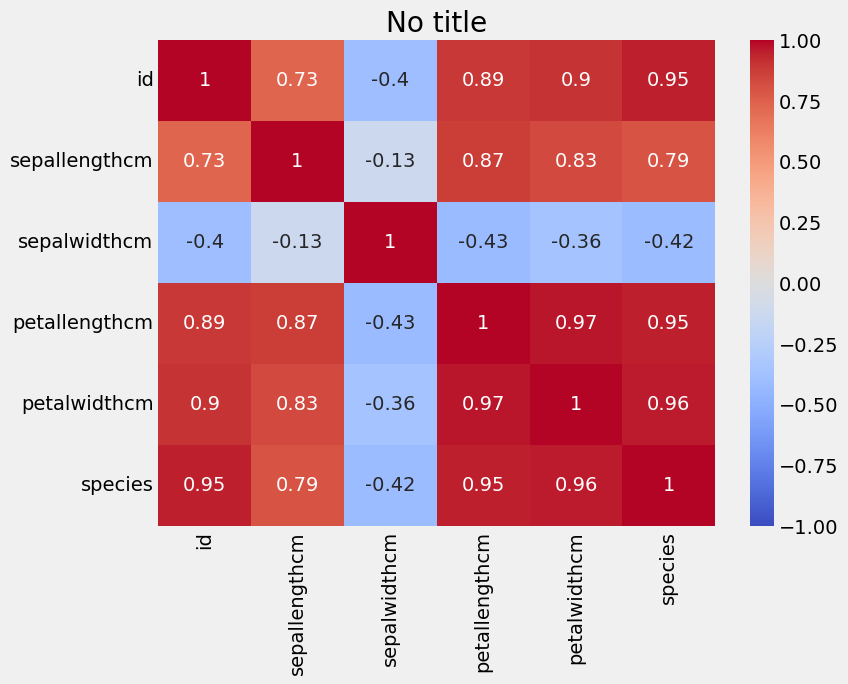

In [17]:
corr_matrix = winsored_df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('No title')
plt.show()

In [18]:
df.drop('id', axis = 1, inplace = True)
feature_columns = ['sepallengthcm', 'sepalwidthcm', 'petallengthcm','petalwidthcm']
## feature
X = df[feature_columns].values 
## Target
y = df['species'].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =20)

In [20]:
print(f'Train data size: {X_train.shape}\nTest data size: {X_test.shape}')

Train data size: (105, 4)
Test data size: (45, 4)


In [21]:
print(f'Feature size: {X.shape}\nTarget size: {y.shape}')

Feature size: (150, 4)
Target size: (150,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.38146701,  0.2293509 , -1.35243628, -1.29318002],
       [-0.53742856,  1.7618319 , -1.1293321 , -1.03937834],
       [-1.01973625,  0.44827676, -1.29666023, -1.29318002],
       [-0.1756978 , -1.3031301 ,  0.71127737,  0.99103516],
       [-0.89915932,  1.54290604, -1.01778001, -1.03937834],
       [ 0.66834065, -0.64635253,  1.04593363,  1.24483684],
       [ 0.42718681,  0.66720261,  0.93438155,  1.37173769],
       [-0.53742856,  0.66720261, -1.24088419, -1.03937834],
       [ 0.54776373,  0.44827676,  1.26903781,  1.62553937],
       [ 0.18603296, -1.95990768,  0.15351692, -0.27797328],
       [-0.29627472, -0.42742667, -0.06958726,  0.10272925],
       [-0.29627472, -0.20850082,  0.43239714,  0.35653094],
       [-1.62262085, -1.74098182, -1.35243628, -1.16627918],
       [-0.89915932,  0.66720261, -1.24088419, -1.29318002],
       [-0.41685164, -1.52205596,  0.04196483, -0.15107243],
       [ 0.42718681, -0.42742667,  0.32084506,  0.10272925],
       [-0.05512088, -1.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate
model = KNeighborsClassifier(n_neighbors =7)
# train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_pred, y_test)
print(f'{round(accuracy*100, 2)}%')

97.78%


In [25]:
neighbors = np.arange(3, 35)

train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(f'Train Accuracies: \n{train_accuracies}\n\nTest Accuracies: \n{test_accuracies}')

Train Accuracies: 
{3: 0.9809523809523809, 4: 0.9809523809523809, 5: 0.9809523809523809, 6: 0.9904761904761905, 7: 0.9904761904761905, 8: 0.9809523809523809, 9: 0.9714285714285714, 10: 0.9619047619047619, 11: 0.9523809523809523, 12: 0.9619047619047619, 13: 0.9619047619047619, 14: 0.9619047619047619, 15: 0.9619047619047619, 16: 0.9714285714285714, 17: 0.9619047619047619, 18: 0.9619047619047619, 19: 0.9619047619047619, 20: 0.9428571428571428, 21: 0.9428571428571428, 22: 0.9428571428571428, 23: 0.9523809523809523, 24: 0.9523809523809523, 25: 0.9523809523809523, 26: 0.9523809523809523, 27: 0.9523809523809523, 28: 0.9523809523809523, 29: 0.9523809523809523, 30: 0.9619047619047619, 31: 0.9619047619047619, 32: 0.9714285714285714, 33: 0.9714285714285714, 34: 0.9619047619047619}

Test Accuracies: 
{3: 0.9333333333333333, 4: 0.9333333333333333, 5: 0.9555555555555556, 6: 0.9555555555555556, 7: 0.9777777777777777, 8: 0.9555555555555556, 9: 0.9777777777777777, 10: 0.9777777777777777, 11: 0.97777777

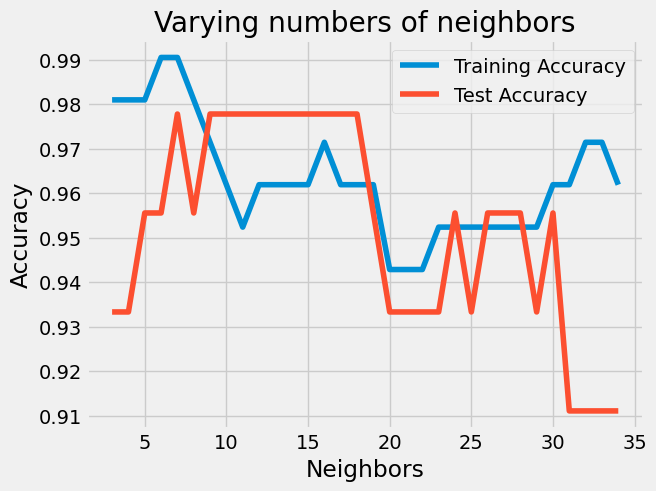

In [26]:
plt.title('Varying numbers of neighbors')
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Test Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [28]:
print(f'Trainning Accuracy: {knn.score(X_train, y_train)}')
print(f'Testing Accuracy: {knn.score(X_test, y_test)}')

Trainning Accuracy: 0.9714285714285714
Testing Accuracy: 0.9777777777777777


In [29]:
models = ['KNN',"Gaussian Naive Bayes"]
scores = []

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate
model = KNeighborsClassifier(n_neighbors =9)
# train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_pred, y_test)
print(f'{round(accuracy*100, 2)}%')

scores.append(accuracy_score(y_pred, y_test))

97.78%


In [31]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, y_train)

GaussianNB()

In [32]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_prediction = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_prediction) 
print(f'{round(accuracy*100, 2)}%')

91.11%


In [33]:
scores.append(accuracy_score(y_test,y_prediction))

In [34]:
df1 = pd.DataFrame({"Mdoels":models,"Accuracy_score":scores})
df1

,Mdoels,Accuracy_score
0,KNN,0.977778
1,Gaussian Naive Bayes,0.911111


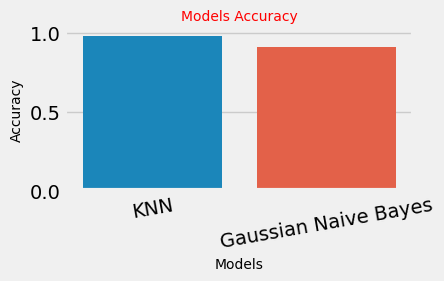

In [35]:
plt.figure(figsize=(4,2))
sns.barplot(data=df1,x="Mdoels",y="Accuracy_score")
plt.xticks(rotation=10)
plt.title("Models Accuracy",size=10,color="red")
plt.xlabel("Models",size=10)
plt.ylabel("Accuracy",size=10)
plt.show()